*1. Extraction automatique des termes*

In [2]:
Texte = "That D.Z. poster-print costs 120.50DA..."

* split() divise simplement la chaîne à chaque espace.
* Il laisse les ponctuations comme : ou les unités comme 120.50DA... telles quelles.
* Les abréviations comme D.Z. sont laissées en une seule unité, mais si elles étaient séparées par des espaces, elles seraient découpées.

In [3]:
Termes = Texte.split()

In [4]:
Termes

['That', 'D.Z.', 'poster-print', 'costs', '120.50DA...']

In [5]:
import nltk

Cette méthode utilise des expressions régulières pour extraire uniquement les mots constitués de lettres, chiffres, et underscores (\w). Elle va donc ignorer la ponctuation et les unités attachées aux nombres.
* L’expression régulière \w+ cherche des groupes de lettres, de chiffres ou d’underscores.
Elle découpe D.Z. en D et Z parce qu'elle ignore les points.
* Les nombres comme 120.50DA sont séparés en 120 et 50DA car \w+ ne reconnaît pas les points (.), et donc il les sépare.
* Les unités ou ponctuations comme : ou ... sont complètement ignorées.

In [6]:
ExpReg = nltk.RegexpTokenizer('\w+') # \w : équivalent à [a-zA-Z0-9_]

In [7]:
Termes = ExpReg.tokenize(Texte)

In [8]:
Termes

['That', 'D', 'Z', 'poster', 'print', 'costs', '120', '50DA']

In [9]:
ExpReg = nltk.RegexpTokenizer('\w+|(?:[A-Z]\.)+') # ?: nécessaire pour l'utilisation des parenthèses

In [10]:
Termes = ExpReg.tokenize(Texte)

In [11]:
Termes

['That', 'D', 'Z', 'poster', 'print', 'costs', '120', '50DA']

In [12]:
ExpReg = nltk.RegexpTokenizer('(?:[A-Z]\.)+|\w+')

In [13]:
Termes = ExpReg.tokenize(Texte)

In [14]:
Termes

['That', 'D.Z.', 'poster', 'print', 'costs', '120', '50DA']

In [15]:
ExpReg = nltk.RegexpTokenizer('(?:[A-Z]\.)+|\w+|\.{3}')

In [16]:
Termes = ExpReg.tokenize(Texte)

In [17]:
Termes

['That', 'D.Z.', 'poster', 'print', 'costs', '120', '50DA', '...']

In [19]:
ExpReg = nltk.RegexpTokenizer('(?:[A-Z]\.)+|\d+(?:\.\d+)?DA?|\w+|\.{3}') # \d : équivalent à [0-9]

In [20]:
Termes = ExpReg.tokenize(Texte)

In [21]:
Termes

['That', 'D.Z.', 'poster', 'print', 'costs', '120.50DA', '...']

*2. Suppression des mots-vides*

In [23]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ryan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
ExpReg = nltk.RegexpTokenizer('(?:[A-Z]\.)+|\d+(?:\.\d+)?DA?|\w+|\.{3}')
Termes = ExpReg.tokenize(Texte)

In [25]:
Termes

['That', 'D.Z.', 'poster', 'print', 'costs', '120.50DA', '...']

In [26]:
MotsVides = nltk.corpus.stopwords.words('english')
TermesSansMotsVides = [terme for terme in Termes if terme.lower() not in MotsVides]

In [27]:
TermesSansMotsVides

['D.Z.', 'poster', 'print', 'costs', '120.50DA', '...']

*3. Normalisation (stemming) des termes extraits*

In [ ]:
Porter = nltk.PorterStemmer()
TermesNormalisation = [Porter.stem(terme) for terme in TermesSansMotsVides]

In [ ]:
Lancaster = nltk.LancasterStemmer()
>>> TermesNormalisation = [Lancaster.stem(terme) for terme in TermesSansMotsVides]

In [32]:
import pandas as pd
import numpy as np

# Création des données sous forme de DataFrame
data = {
    'TP1': [7.75, 6, 6, 6.17, 8, 7.75, 6, 6.75, 5.67, 6.5],
    'Test1': [5, 6, 4, 4, 5, 2, 4, 5, 6, 6],
    'EMD1': [13.5, 11, 7.5, 5.5, 11, 10.5, 5.5, 9, 6, 9],
    'Final1': [13.13, 11.5, 8.75, 7.84, 12, 10.13, 7.75, 10.38, 8.84, 10.75],
    'TP2': [7.25, 7.75, 7.87, 7.75, 6.62, 7.5, 7.37, 7.62, 8.37, 7.37],
    'Test2': [6.5, 5.5, 6.25, 4, 6.5, 7.5, 3.5, 7.5, 4, 5.5],
    'EMD2': [16, 11.5, 10, 11.5, 13, 12.5, 12.5, 5.5, 8.5, 17],
    'Final2': [14.88, 12.38, 12.06, 11.44, 13.63, 13.31, 11.75, 10.19, 10.06, 15.44]
}

df = pd.DataFrame(data)

q1_final1 = df['Final1'].quantile(0.25)
q3_final1 = df['Final1'].quantile(0.75)
q1_final2 = df['Final2'].quantile(0.25)
q3_final2 = df['Final2'].quantile(0.75)
print(q1_final1, q3_final1, q1_final2, q3_final2)
summary_final1 = df['Final1'].describe(percentiles=[0.25, 0.5, 0.75])
summary_final2 = df['Final2'].describe(percentiles=[0.25, 0.5, 0.75])
print(summary_final1)
print(summary_final2)



8.7725 11.3125 11.5175 13.55
count    10.000000
mean     10.107000
std       1.804082
min       7.750000
25%       8.772500
50%      10.255000
75%      11.312500
max      13.130000
Name: Final1, dtype: float64
count    10.000000
mean     12.514000
std       1.808094
min      10.060000
25%      11.517500
50%      12.220000
75%      13.550000
max      15.440000
Name: Final2, dtype: float64


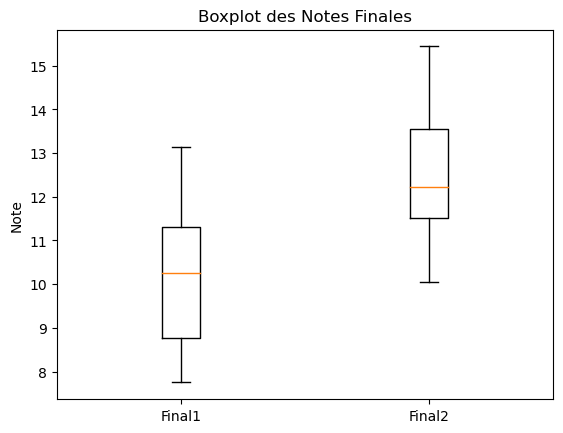

In [33]:
import matplotlib.pyplot as plt

plt.boxplot([df['Final1'], df['Final2']], labels=['Final1', 'Final2'])
plt.title('Boxplot des Notes Finales')
plt.ylabel('Note')
plt.show()


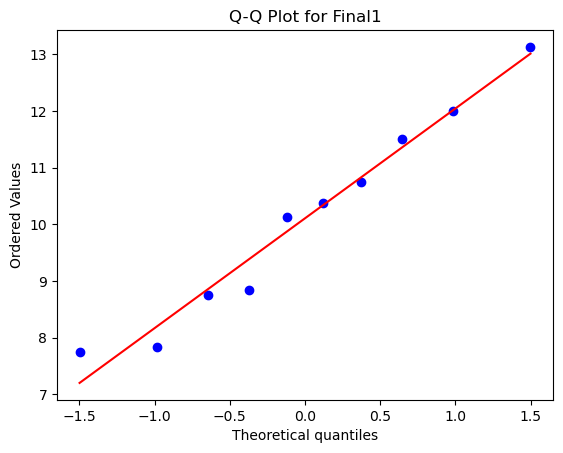

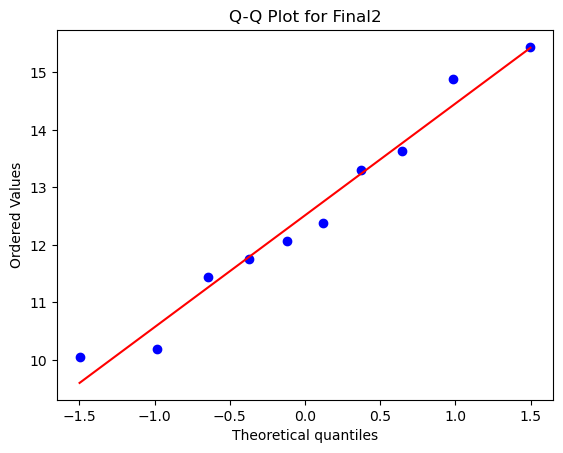

In [34]:
import scipy.stats as stats

# Q-Q Plot pour Final1
stats.probplot(df['Final1'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Final1')
plt.show()

# Q-Q Plot pour Final2
stats.probplot(df['Final2'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Final2')
plt.show()


In [29]:
import plotly.express as px

country = input("enter the country name:")

data = {
    'Country':['France' , 'Chine'],
    'Value':[456 ,70]
}

fig = px.choropleth(
    data,
    locations='Country',
    locationmode='country names',
    color='Value',
    color_continuous_scale='Inferno',
    title=f'Country Map Highlighting {country}'
    )

fig.show()